# Hill Climbing Algorithm
Intuitively, the way you'd want to think about this is like adding a bias to the Neural Netork layer. 

$$y = x.w + b$$

In [28]:
import gymnasium as gym
import torch
import numpy as np
import matplotlib.pyplot as plt
env = gym.make('CartPole-v1')
# from the following we are getting number of obervations'shape and actions
n_state = env.observation_space.shape[0]
n_action = env.action_space.n

In [8]:
def run_episode(env,weight):
    done = False
    total_reward = 0
    state,info = env.reset() # resetting environment for every game play
    truncated = False
    while (not done) and (not truncated):
        state = torch.from_numpy(state).float()
        action = torch.argmax(torch.matmul(state, weight))

#         action = env.action_space.sample()
        state, reward, done, truncated, info = env.step(action.item())
        total_reward += reward
        if done or truncated:
            state,info = env.reset()
#     state,info = env.reset()
    return total_reward
    

In [4]:
print(n_state,n_action)

4 2


In [5]:
n_episode = 1000

In [15]:
best_total_reward = 0
best_weight = torch.rand(n_state,n_action)
total_rewards = []
noise_scale = 0.01 # b in the first cell


In [24]:
for i in range(20):
    best_total_reward = 0
    best_weight = torch.rand(n_state,n_action)
    total_rewards = []
    noise_scale = 0.01 # b in the first cell

    for episode in range(n_episode):
        weight = best_weight + torch.rand(n_state,n_action)*noise_scale
        total_reward = run_episode(env, weight)
        if total_reward>= best_total_reward:
            best_total_reward = total_reward
            best_weight = weight
    #         noise_scale = max(noise_scale/2,1e-4)
    #     else:
    #         noise_scale = min(noise_scale*2,2)
        total_rewards.append(total_reward)
#         print('Episode {}: {}'.format(episode + 1, total_reward))
    print('Mean ',np.average(total_rewards))


Mean  9.021
Mean  12.009
Mean  9.319
Mean  30.236
Mean  27.837
Mean  500.0
Mean  9.205
Mean  9.596
Mean  62.28
Mean  8.842
Mean  276.929
Mean  9.487
Mean  65.727
Mean  28.626
Mean  135.735
Mean  8.791
Mean  102.931
Mean  8.925
Mean  9.468
Mean  8.898


Notice that there is a lot of varience in the average score computed above. We can make sense of this by realising that the bias is same through out. So if you start with a bad initial weight you need to bias it a lot. But in a good initial bias, we only need to add a little weight. To implement that we use the following code:

In [25]:
for i in range(20):
    best_total_reward = 0
    best_weight = torch.rand(n_state,n_action)
    total_rewards = []
    noise_scale = 0.01 # b in the first cell

    for episode in range(n_episode):
        weight = best_weight + torch.rand(n_state,n_action)*noise_scale
        total_reward = run_episode(env, weight)
        if total_reward>= best_total_reward:
            best_total_reward = total_reward
            best_weight = weight
            noise_scale = max(noise_scale/2,1e-4)
        else:
            noise_scale = min(noise_scale*2,2)
        total_rewards.append(total_reward)
#         print('Episode {}: {}'.format(episode + 1, total_reward))
    print('Mean ',np.average(total_rewards))


Mean  473.375
Mean  471.323
Mean  489.536
Mean  454.407
Mean  443.6
Mean  466.12
Mean  452.019
Mean  482.928
Mean  364.537
Mean  485.927
Mean  342.201
Mean  463.631
Mean  455.965
Mean  483.822
Mean  476.698
Mean  463.798
Mean  476.077
Mean  459.126
Mean  341.007
Mean  318.332


Notice that the varience has gone down and the reward mean has gone up substantially

In [26]:
 for episode in range(n_episode):
        weight = best_weight + torch.rand(n_state,n_action)*noise_scale
        total_reward = run_episode(env, weight)
        if total_reward>= best_total_reward:
            best_total_reward = total_reward
            best_weight = weight
            noise_scale = max(noise_scale/2,1e-4)
        else:
            noise_scale = min(noise_scale*2,2)
        total_rewards.append(total_reward)

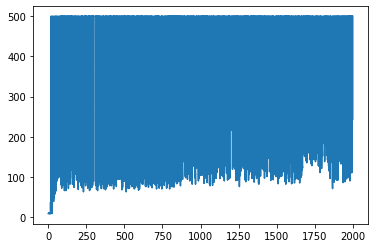

In [30]:
plt.plot(total_rewards)